<a href="https://colab.research.google.com/github/SunnyShrestha-repo/recommenderSys-Debaising/blob/main/musicRecommenderMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#GENERAL DRIVE SET UP

In [ ]:
from google.colab import drive
drive.flush_and_unmount()
print('All changes made in this colab session should now be visible in Drive.')

Drive not mounted, so nothing to flush and unmount.
All changes made in this colab session should now be visible in Drive.


In [ ]:
##### TODO CHANGE THIS TO THE PATH IN GOOGLE DRIVE WHERE YOU COPIED THE ch03 FOLDER #####
google_drive_root='MLBiasesAnalysis/MusicRS'

In [ ]:
google_drive_mount_location = '/content/drive'
google_file_prefix=google_drive_mount_location + '/My Drive/' + google_drive_root + '/'

In [ ]:
google_file_prefix

'/content/drive/My Drive/MLBiasesAnalysis/MusicRS/'

In [ ]:
# Read more here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=D78AM1fFt2ty
from google.colab import drive
drive.mount(google_drive_mount_location)

Mounted at /content/drive


In [ ]:
music_files =  google_file_prefix + 'data/modelData/'
music_files

'/content/drive/My Drive/MLBiasesAnalysis/MusicRS/data/modelData/'

#LIBRARY SET UP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from scipy.sparse import csr_matrix
import sklearn
from sklearn.decomposition import TruncatedSVD
import csv
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 30.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633981 sha256=265d5531b20963e0075b4d5f22794497038b5174e66af21f7414d4360332ebbd
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import Dataset, Reader

In [ ]:
from surprise.model_selection import train_test_split

In [ ]:
from surprise import KNNWithMeans

In [ ]:
from surprise.similarities import pearson_baseline
from surprise.prediction_algorithms.knns import KNNBasic, KNNBaseline

#Plots

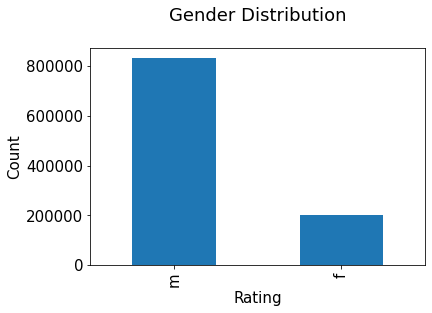

In [ ]:
plt.rc("font", size=15)
combined_ratings_df.gender.value_counts(sort=False).plot(kind='bar')
plt.title('Gender Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig(music_files+'genderDistribution.png', bbox_inches='tight')
plt.show()

#TAKE USER INPUT

In [ ]:
study_data = music_files +'userStudyData/'
study_data

'/content/drive/My Drive/MLBiasesAnalysis/MusicRS/data/modelData/userStudyData/'

In [ ]:
user_input = music_files + "userdata-participant20.txt"

In [ ]:
user_input_df = pd.read_csv(user_input, sep='\t', names=['user_id', 'play_count', 'user_name', 'country', 'age', 'gender', 'track_id','track_artist', 'track_name'])
user_input_df

,user_id,play_count,user_name,country,age,gender,track_id,track_artist,track_name
0,24000,20,Ericka Corral,US,21-24,nb,341591,Mildlife,The Magnificent Moon
1,24000,20,Ericka Corral,US,21-24,nb,134207,Pierce The Veil,Besitos
2,24000,20,Ericka Corral,US,21-24,nb,14560,JPEGMAFIA,1539 N. Calvert
3,24000,20,Ericka Corral,US,21-24,nb,120461,Good Morning,Warned You
4,24000,20,Ericka Corral,US,21-24,nb,66510,Kali Uchis,After the Storm
5,24000,20,Ericka Corral,US,21-24,nb,119554,YEEK,Solstice


In [ ]:
user_input_df["play_count"] = np.random.randint(5,200, size=(len(user_input_df["play_count"])))
user_input_df

,user_id,play_count,user_name,country,age,gender,track_id,track_artist,track_name
0,24000,177,Ericka Corral,US,21-24,nb,341591,Mildlife,The Magnificent Moon
1,24000,181,Ericka Corral,US,21-24,nb,134207,Pierce The Veil,Besitos
2,24000,129,Ericka Corral,US,21-24,nb,14560,JPEGMAFIA,1539 N. Calvert
3,24000,155,Ericka Corral,US,21-24,nb,120461,Good Morning,Warned You
4,24000,164,Ericka Corral,US,21-24,nb,66510,Kali Uchis,After the Storm
5,24000,134,Ericka Corral,US,21-24,nb,119554,YEEK,Solstice


In [ ]:
# userstudyData = music_files +'musicRecommendationdata.csv'
userstudyData = study_data +'Participant20Recommendation11022022.csv'
with open(userstudyData, 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['user_id', 'play_count', 'user_name', 'country', 'age', 'gender', 'track_id', 'track_artist', 'track_name'])

In [ ]:
user_input_df.to_csv(userstudyData, mode='a', index=False, header=False)

In [ ]:
userinput_df = user_input_df.drop(['user_name','country', 'age', 'gender', 'track_artist', 'track_name'], axis=1)

In [ ]:
userinput_df.head()

,user_id,play_count,track_id
0,24000,155,35903
1,24000,25,58882
2,24000,168,321
3,24000,100,317807
4,24000,197,1249379


#TRAINING DATA

In [ ]:
songs_file = music_files + "tracksList.csv"

In [ ]:
songs_df = pd.read_csv(songs_file, sep=',')#, names=['track_artist','track_name'],na_values='',na_filter=False,error_bad_lines=False,quoting=csv.QUOTE_NONE)
songs_df.head(5)

,track_id,track_artist,track_name
0,0,Noize MC,!!L!VE!
1,1,Godsmack,1000hp
2,2,Feist,1234
3,3,[AMATORY],15/03
4,4,Skid Row,18 and Life


In [ ]:
# ratings = music_files + "us_canada_user_ratings.txt"
ratings = music_files +"user_song_regexp_since_2016_pc_gt_1_user_gte_5_song_gte_5.txt"
# ratings_file = music_files +"user_song_regexp_since_2016_pc_gt_1_user_gte_5_song_gte_5.txt"

In [ ]:
# ratings_df = pd.read_csv(ratings, sep=',' ) #, names=['old_id', 'user_id', 'track_id','play_count','user_name', 'country', 'age', 'gender', 'timestamp'])
ratings_df = pd.read_csv(ratings, sep='\t', names=['user_id', 'track_id', 'play_count'])
ratings_df.head(10)

,user_id,track_id,play_count
0,0,0,2
1,0,1,3
2,0,2,2
3,0,3,2
4,0,4,9
5,0,5,3
6,0,6,39
7,0,7,8
8,0,8,2
9,0,9,3


#MODEL 1 DATA

In [ ]:
main_data_file = music_files + 'mainTrainingFile_surprise.csv'

In [ ]:
ratings_df1 = pd.read_csv(main_data_file, sep=',' ) 

In [ ]:
ratings_df1.tail(10)

,user_id,track_id,play_count
1033066,23244,64996,2
1033067,23244,719459,3
1033068,23244,139300,4
1033069,23244,102618,10
1033070,23244,32968,3
1033071,23244,32975,10
1033072,23244,52121,2
1033073,23244,33025,4
1033074,23244,65232,2
1033075,23244,894,4


In [ ]:
ratings_df1.shape

(1033076, 3)

In [ ]:
combined_ratings = music_files + "us_canada_user_ratings.txt"

In [ ]:
combined_ratings_df = pd.read_csv(combined_ratings, sep=',' ) 

In [ ]:
combined_ratings_df.head()

,Unnamed: 0,user_id,track_id,play_count,user_name,country,age,gender,timestamp
0,575670,240,115305,15,5FDPFan,US,13,m,2012-01-17 05:44:16
1,575671,240,38296,3,5FDPFan,US,13,m,2012-01-17 05:44:16
2,575672,240,29877,26,5FDPFan,US,13,m,2012-01-17 05:44:16
3,575673,240,60489,2,5FDPFan,US,13,m,2012-01-17 05:44:16
4,575674,240,104499,8,5FDPFan,US,13,m,2012-01-17 05:44:16


In [ ]:
combined_ratings_df.shape

(1033076, 9)

In [ ]:
ratings_df1.loc[ratings_df1['user_id']==24000]

,user_id,track_id,play_count


Add userinput to the trainingdata

In [ ]:
new_train_data = ratings_df1.append(userinput_df, ignore_index = True)

In [ ]:
new_train_data.shape

(1033082, 3)

In [ ]:
new_train_data.loc[new_train_data['user_id']==24000]

,user_id,track_id,play_count
1033076,24000,341591,177
1033077,24000,134207,181
1033078,24000,14560,129
1033079,24000,120461,155
1033080,24000,66510,164
1033081,24000,119554,134


In [ ]:
new_train_data.to_csv(music_files + 'model1TrainingData.csv', index=False, header=False)

In [ ]:
new_train_data.tail(10)

,user_id,track_id,play_count
1033073,23244,33025,4
1033074,23244,65232,2
1033075,23244,894,4
1033076,24000,35903,155
1033077,24000,58882,25
1033078,24000,321,168
1033079,24000,317807,100
1033080,24000,1249379,197
1033081,24000,96574,119
1033082,24000,316814,127


#KNNWithMeans Recommender 
For model 1 and 2

In [ ]:
myReader = Reader(line_format='user item rating', sep=',', rating_scale=(2,2485))

# MODEL 1 DATA
# filepath = music_files+'model1TrainingData.csv'
filepath = music_files+ 'model1TrainingData.csv'

data = Dataset.load_from_file(filepath,reader=myReader)



In [ ]:
trainsetfull = data.build_full_trainset()

In [ ]:
max_k =20
mini_k = 5
my_sim_options = {'name':'pearson', 
                  'user_based':True, 'min_support': 3}
algo = KNNWithMeans(k=max_k, min_k=mini_k, sim_options=my_sim_options)
algo.fit(trainsetfull)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
new_user_inner_uid= trainsetfull.to_inner_uid('24000')

closest_users = list(algo.get_neighbors(new_user_inner_uid, k=10))

closest_users_rid =list(algo.trainset.to_raw_uid(inner_id) for inner_id in closest_users)

closest_users_rid = list(int(a) for a in closest_users_rid)

closest_df = ratings_df.loc[ratings_df['user_id'].isin(closest_users_rid)]

top_tracks_df = closest_df.sort_values('play_count', ascending=False).drop_duplicates(['user_id'])

tracks_recommended= top_tracks_df['track_id'].tolist()

recommended_songs = songs_df.loc[songs_df['track_id'].isin(tracks_recommended)]

In [ ]:
with open(userstudyData, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(
                ['KNNWithMeans', 'Model 1: Pearson'])

In [ ]:
recommended_songs.to_csv(userstudyData, mode='a', index=False)

#MODEL 2 DATA

In [ ]:
downsampled_file = music_files + 'df_downsampled_surprise.csv'

In [ ]:
ratings_df3 = pd.read_csv(downsampled_file, sep=',' ) #index=False, header=False)

In [ ]:
ratings_df3.shape

(403794, 3)

In [ ]:
ratings_df3.loc[ratings_df3['user_id']==24000]

,user_id,track_id,play_count


Add userinput to the trainingdata

In [ ]:
new_train_data = ratings_df3.append(userinput_df, ignore_index = True)

In [ ]:
new_train_data.shape

(403800, 3)

In [ ]:
new_train_data.loc[new_train_data['user_id']==24000]

,user_id,track_id,play_count
403794,24000,341591,177
403795,24000,134207,181
403796,24000,14560,129
403797,24000,120461,155
403798,24000,66510,164
403799,24000,119554,134


In [ ]:
new_train_data.to_csv(music_files + 'model2TrainingData.csv', index=False, header=False)

In [ ]:
surprise_file = music_files + 'model2TrainingData.csv'

#KNNWithMeans Recommender
For model 1 and 2

In [ ]:
myReader = Reader(line_format='user item rating', sep=',', rating_scale=(2,2485))

# MODEL 2 DATA
filepath = music_files+'model2TrainingData.csv'

data = Dataset.load_from_file(filepath,reader=myReader)

trainsetfull = data.build_full_trainset()

In [ ]:
max_k =20
mini_k = 5
my_sim_options = {'name':'pearson', 
                  'user_based':True, 'min_support': 3}
algo = KNNWithMeans(k=max_k, min_k=mini_k, sim_options=my_sim_options)

algo.fit(trainsetfull)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [ ]:
new_user_inner_uid= trainsetfull.to_inner_uid('24000')

closest_users = list(algo.get_neighbors(new_user_inner_uid, k=10))

closest_users_rid =list(algo.trainset.to_raw_uid(inner_id) for inner_id in closest_users)

closest_users_rid = list(int(a) for a in closest_users_rid)

closest_df = ratings_df.loc[ratings_df['user_id'].isin(closest_users_rid)]

top_tracks_df = closest_df.sort_values('play_count', ascending=False).drop_duplicates(['user_id'])

tracks_recommended= top_tracks_df['track_id'].tolist()

recommended_songs = songs_df.loc[songs_df['track_id'].isin(tracks_recommended)]

In [ ]:
with open(userstudyData, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(
                ['KNNwithMeans', 'Model 2: Pearson-Balanced'])

In [ ]:
recommended_songs.to_csv(userstudyData, mode='a', index=False)

In [ ]:
combratings = music_files + "us_canada_user_ratings.txt"

In [ ]:
combratings_df = pd.read_csv(combratings, sep=',' ) #, names=['old_id', 'user_id', 'track_id','play_count','user_name', 'country', 'age', 'gender', 'timestamp'])
combratings_df.head(10)

,Unnamed: 0,user_id,track_id,play_count,user_name,country,age,gender,timestamp
0,575670,240,115305,15,5FDPFan,US,13,m,2012-01-17 05:44:16
1,575671,240,38296,3,5FDPFan,US,13,m,2012-01-17 05:44:16
2,575672,240,29877,26,5FDPFan,US,13,m,2012-01-17 05:44:16
3,575673,240,60489,2,5FDPFan,US,13,m,2012-01-17 05:44:16
4,575674,240,104499,8,5FDPFan,US,13,m,2012-01-17 05:44:16
5,575675,240,356177,7,5FDPFan,US,13,m,2012-01-17 05:44:16
6,575676,240,1325,4,5FDPFan,US,13,m,2012-01-17 05:44:16
7,575677,240,356178,6,5FDPFan,US,13,m,2012-01-17 05:44:16
8,575678,240,322169,7,5FDPFan,US,13,m,2012-01-17 05:44:16
9,575679,240,356179,9,5FDPFan,US,13,m,2012-01-17 05:44:16


In [ ]:
# combratings_df.groupby(["gender"])["play_count"].nlargest(10)
top_tracks = combratings_df.sort_values(['play_count'],ascending=False).groupby('gender').head(10)

In [ ]:
top_tracks_male = top_tracks.loc[top_tracks['gender']=='m']

In [ ]:
top_tracks_fmale = top_tracks.loc[top_tracks['gender']=='f']

In [ ]:
songs_df.loc[songs_df['track_id'].isin(list(top_tracks_male['track_id']))].

In [ ]:
songs_df.loc[songs_df['track_id'].isin(list(top_tracks_fmale['track_id']))]

# MODEL 3 DATA

In [ ]:
ci_data_file = music_files + 'ci_training_data.csv'

In [ ]:
ratings_df4 = pd.read_csv(ci_data_file, sep=',' ) #index=False, header=False)

In [ ]:
ratings_df4.shape

(1033076, 3)

In [ ]:
ratings_df4.loc[ratings_df4['user_id']==24000]

,user_id,track_id,play_count


In [ ]:
new_train_data = ratings_df4.append(userinput_df, ignore_index = True)

In [ ]:
new_train_data.shape

(1033082, 3)

In [ ]:
new_train_data.loc[new_train_data['user_id']==24000]

,user_id,track_id,play_count
1033076,24000,341591,177
1033077,24000,134207,181
1033078,24000,14560,129
1033079,24000,120461,155
1033080,24000,66510,164
1033081,24000,119554,134


In [ ]:
new_train_data.to_csv(music_files + 'model3TrainingData.csv', index=False, header=False)

In [ ]:
surprise_file = music_files + 'model3TrainingData.csv'

#KNNWithMeans with pearson baseline
For model 3

In [ ]:
myReader = Reader(line_format='user item rating', sep=',', rating_scale=(2,2485))

# MODEL 3 DATA
filepath = music_files+'model3TrainingData.csv'

data = Dataset.load_from_file(filepath,reader=myReader)

trainsetfull = data.build_full_trainset()

In [ ]:
curr_k = 20
my_sim_options = {'name': 'pearson_baseline','user_based':True, 'min_support': 5, 'shrinkage': 100}

algo = KNNWithMeans(k = curr_k, sim_options = my_sim_options)

algo.fit(trainsetfull)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
new_user_inner_uid= trainsetfull.to_inner_uid('24000')

closest_users = list(algo.get_neighbors(new_user_inner_uid, k=10))

closest_users_rid =list(algo.trainset.to_raw_uid(inner_id) for inner_id in closest_users)

closest_users_rid = list(int(a) for a in closest_users_rid)

closest_df = ratings_df.loc[ratings_df['user_id'].isin(closest_users_rid)]

top_tracks_df = closest_df.sort_values('play_count', ascending=False).drop_duplicates(['user_id'])

tracks_recommended= top_tracks_df['track_id'].tolist()

recommended_songs = songs_df.loc[songs_df['track_id'].isin(tracks_recommended)]

In [ ]:
with open(userstudyData, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(
                ['KNNWithMeans', 'Model 3: Pearson Baseline - Counterfactual Intervention'])

In [ ]:
recommended_songs.to_csv(userstudyData, mode='a', index=False)

#MODEL 4 DATA

In [ ]:
main_data_file = music_files + 'mainTrainingFile_surprise.csv'

In [ ]:
ratings_df1 = pd.read_csv(main_data_file, sep=',' ) 

In [ ]:
ratings_df1.tail(10)

,user_id,track_id,play_count
1033066,23244,64996,2
1033067,23244,719459,3
1033068,23244,139300,4
1033069,23244,102618,10
1033070,23244,32968,3
1033071,23244,32975,10
1033072,23244,52121,2
1033073,23244,33025,4
1033074,23244,65232,2
1033075,23244,894,4


In [ ]:
ratings_df1.loc[ratings_df1['user_id']==24000]

,user_id,track_id,play_count


In [ ]:
new_train_data = ratings_df1.append(userinput_df, ignore_index = True)

In [ ]:
new_train_data.shape

(1033082, 3)

In [ ]:
new_train_data.loc[new_train_data['user_id']==24000]

,user_id,track_id,play_count
1033076,24000,341591,177
1033077,24000,134207,181
1033078,24000,14560,129
1033079,24000,120461,155
1033080,24000,66510,164
1033081,24000,119554,134


In [ ]:
new_train_data.to_csv(music_files + 'model4TrainingData.csv', index=False,header=False)

In [ ]:
surprise_file = music_files + 'model4TrainingData.csv'

#KNNWBaseline with Posterior Regularization SGD
For model 4

In [ ]:
myReader = Reader(line_format='user item rating', sep=',', rating_scale=(2,2485))

# MODEL 4 DATA
filepath = music_files+'model4TrainingData.csv'

data = Dataset.load_from_file(filepath,reader=myReader)

trainsetfull = data.build_full_trainset()

In [ ]:
chosen_reg_sgd = 0.10	
chosen_learning_rate_sgd = 0.010
chosen_k_sgd = 20
sim_pearson_baseline = {'name': 'pearson_baseline','user_based':True, 'min_support': 3, 'shrinkage': 100}

algo =  KNNBaseline(
    k = chosen_k_sgd, 
    sim_options = sim_pearson_baseline,
    bsl_options = {
        'method':'sgd', 'reg': chosen_reg_sgd,  'learning_rate': chosen_learning_rate_sgd}
)
    
# algo.fit(trainset)

In [ ]:
algo.fit(trainsetfull)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
new_user_inner_uid= trainsetfull.to_inner_uid('24000')

closest_users = list(algo.get_neighbors(new_user_inner_uid, k=10))

closest_users_rid =list(algo.trainset.to_raw_uid(inner_id) for inner_id in closest_users)

closest_users_rid = list(int(a) for a in closest_users_rid)

closest_df = ratings_df.loc[ratings_df['user_id'].isin(closest_users_rid)]

top_tracks_df = closest_df.sort_values('play_count', ascending=False).drop_duplicates(['user_id'])

tracks_recommended= top_tracks_df['track_id'].tolist()

recommended_songs = songs_df.loc[songs_df['track_id'].isin(tracks_recommended)]

In [ ]:
with open(userstudyData, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(
                ['KNNBaseline', 'Posterior Regularization- SGD'])

In [ ]:
recommended_songs.to_csv(userstudyData, mode='a', index=False)

#KNNWBaseline with Posterior Regularization ALS
For model 4

In [ ]:
myReader = Reader(line_format='user item rating', sep=',', rating_scale=(2,2485))

# MODEL 4 DATA
filepath = music_files+'model4TrainingData.csv'

data = Dataset.load_from_file(filepath,reader=myReader)

trainsetfull = data.build_full_trainset()

In [ ]:
chosen_reg_i_als = 10
chosen_reg_u_als = 20
chosen_k_als = 20
sim_pearson_baseline = {'name': 'pearson_baseline','user_based':True, 'min_support': 5, 'shrinkage': 100}


algo = KNNBaseline(
    k = chosen_k_als, 
    sim_options = sim_pearson_baseline,
    bsl_options = {
        'method':'als', 'reg_i':chosen_reg_i_als, 'reg_u': chosen_reg_u_als }
    )


In [ ]:
algo.fit(trainsetfull)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
new_user_inner_uid= trainsetfull.to_inner_uid('24000')

closest_users = list(algo.get_neighbors(new_user_inner_uid, k=10))

closest_users_rid =list(algo.trainset.to_raw_uid(inner_id) for inner_id in closest_users)

closest_users_rid = list(int(a) for a in closest_users_rid)

closest_df = ratings_df.loc[ratings_df['user_id'].isin(closest_users_rid)]

top_tracks_df = closest_df.sort_values('play_count', ascending=False).drop_duplicates(['user_id'])

tracks_recommended= top_tracks_df['track_id'].tolist()

recommended_songs = songs_df.loc[songs_df['track_id'].isin(tracks_recommended)]

In [ ]:
with open(userstudyData, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(
                ['KNNBaseline', 'Model 4: Posterior Regularization- ALS'])

In [ ]:
recommended_songs.to_csv(userstudyData, mode='a', index=False)

#ENE

In [ ]:
# Model 1
# recommended_songs.to_csv(music_files+'recommenderKNNwithMeans-model1.csv', index=False)

# Model 2
# recommended_songs.to_csv(music_files+'recommenderKNNwithMeans-model2.csv', index=False)

# Model 3
# recommended_songs.to_csv(music_files+'recommenderKNNwithMeansPB-model3.csv', index=False)

# Model 4
# recommended_songs.to_csv(music_files+'recommenderKNNwithMeans-model4.csv', index=False)
recommended_songs.to_csv(music_files+'recommenderKNNBaselineALS-model4.csv', index=False)